# Topics

Mean, Median, Mode​

Standard deviation, variance​

Quantiles​

Range

Histograms​

Bar charts: plt.bar( … ) or df.bar( … )​

Stacked bar chart​

Kernel density plots: sns.histplot( … kde = True)​

Swarm: sns.swarmplot( … )​

Violin: sns.violinplot( … )​

Box plot: sns.boxplot( … ) or df.boxplot( … )​

Segmented univariate analysis (e.g. violin or swarm)

Storytelling With Data
1. Identify who, what, how​
2. Make good and bad: bar, slope, line, scatter, heatmap, table, text graphs

In [1]:
import random
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
numrows = 100
np.random.seed(0)
random.seed(0)
df_groceries = pd.DataFrame({})
df_groceries["name"] = [random.choice(["apples_pound", "oranges_pound", "bananas_pound", "milk_gallon", "lettuce"]) for num in range(numrows)]

In [2]:
numrows = 100
df_groceries = pd.DataFrame({})
#df_groceries["name"] = ["apple", "banana", "orange", "milk", "lettuce"]
df_groceries["name"] = [random.choice(["apples_pound", "bananas_pound", "oranges_pound", "milk_gallon", "lettuce"]) for x in range(numrows)]

In [3]:
def choose_unit_price(name):
    if(name == "apples_pound"):
        return random.uniform(1.00, 2.00)
    elif(name == "oranges_pound"):
        return random.uniform(2.00, 4.00)
    elif(name == "bananas_pound"):
        return random.uniform(1.00, 2.00)
    elif(name == "milk_gallon"):
        return random.uniform(3.00, 5.00)
    elif(name == "lettuce"):
        return random.uniform(1.50, 2.50)

In [4]:
df_groceries["unit_price"] = df_groceries["name"].apply(choose_unit_price)
df_groceries["quantity"] = [random.randint(1, 5) for num in range(numrows)]

In [5]:
start = datetime(2020, 1, 1)
end = datetime(2025, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = numrows)
df_groceries["date_purchased"] = start + pd.to_timedelta(random_days, unit='D')
df_groceries["state"] = [random.choice(["NY", "MA", "CA"]) for num in range(numrows)]

In [6]:
df_groceries

,name,unit_price,quantity,date_purchased,state
0,oranges_pound,2.777284,3,2021-11-15,MA
1,lettuce,2.157616,1,2021-07-13,MA
2,bananas_pound,1.153413,2,2024-07-11,CA
3,bananas_pound,1.690823,2,2023-05-01,NY
4,lettuce,1.957954,3,2022-04-15,NY
...,...,...,...,...,...
95,milk_gallon,3.917329,5,2021-10-01,MA
96,lettuce,1.935441,2,2023-03-01,MA
97,lettuce,2.371411,1,2022-08-30,MA
98,oranges_pound,2.356577,2,2022-05-18,MA


In [7]:
# Only numerical columns
dfnum = df_groceries.select_dtypes(include='number')

In [8]:
# Mean, median, mode
dfnum.mean(axis = 0)

unit_price    2.244599
quantity      2.740000
dtype: float64

In [9]:
dfnum.mean(axis = 1)

0     2.888642
1     1.578808
2     1.576706
3     1.845411
4     2.478977
        ...   
95    4.458664
96    1.967720
97    1.685705
98    2.178288
99    3.375579
Length: 100, dtype: float64

In [10]:
dfnum.median()

unit_price    1.925289
quantity      3.000000
dtype: float64

In [11]:
dfnum.mode()

,unit_price,quantity
0,1.014729,1.0
1,1.021845,NaN
2,1.031545,NaN
3,1.038910,NaN
4,1.042298,NaN
...,...,...
95,4.347550,NaN
96,4.377080,NaN
97,4.524333,NaN
98,4.707549,NaN


In [12]:
dfnum.std()

unit_price    0.953421
quantity      1.353036
dtype: float64

In [13]:
dfnum.var()

unit_price    0.909012
quantity      1.830707
dtype: float64

In [14]:
# Computing the sample variance
((dfnum - dfnum.mean())**2).mean() * dfnum.shape[0] / (dfnum.shape[0] - 1)

unit_price    0.909012
quantity      1.830707
dtype: float64

In [15]:
# Computing the sample standard deviation
np.sqrt(((dfnum - dfnum.mean())**2).mean() * dfnum.shape[0] / (dfnum.shape[0] - 1))

unit_price    0.953421
quantity      1.353036
dtype: float64

In [16]:
dfnum.quantile(q = 0.24)

unit_price    1.597967
quantity      1.000000
Name: 0.24, dtype: float64

In [17]:
dfnum.quantile(q = 0.26)

unit_price    1.609674
quantity      2.000000
Name: 0.26, dtype: float64

In [18]:
dfnum.quantile(q = 0.25)

unit_price    1.608169
quantity      1.750000
Name: 0.25, dtype: float64

In [19]:
np.histogram(dfnum.quantity, bins = 5)

(array([25, 20, 23, 20, 12]), array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]))

In [20]:
pd.Series([1, 2, 3, 4]).quantile(q = 0.1)

np.float64(1.3)

In [21]:
99 * 0.25

24.75

In [22]:
dfnum.min(), dfnum.max()

(unit_price    1.014729
 quantity      1.000000
 dtype: float64,
 unit_price    4.922406
 quantity      5.000000
 dtype: float64)

<Axes: xlabel='name'>

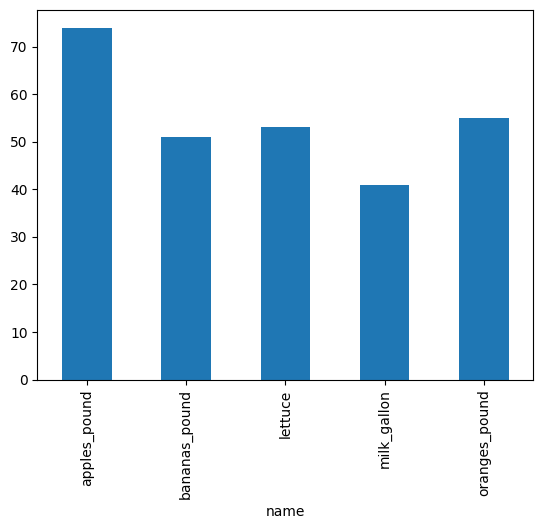

In [23]:
import matplotlib.pyplot as plt

# Number of each product sold
df_groceries.groupby("name")["quantity"].sum().plot.bar()

<Axes: xlabel='unit_price'>

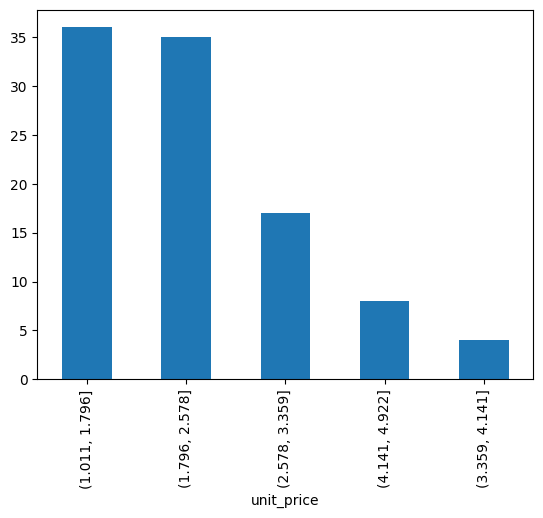

In [24]:
# Number of purchases in each unit price range
pd.cut(dfnum["unit_price"], bins = 5).value_counts().plot.bar()

<Axes: >

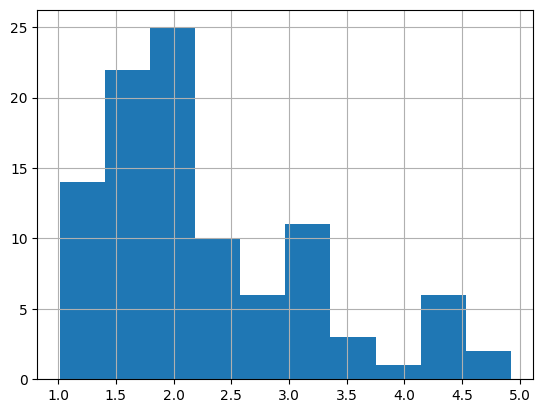

In [25]:
# Number of purchases in each unit price range - histogram
dfnum["unit_price"].hist()

In [26]:
dfcopy = df_groceries.copy()
dfg = dfcopy.groupby(["name", "state"])["quantity"].sum()
dfg_reset = dfg.reset_index()
df_pivot = dfg_reset.pivot_table(index='name', columns='state', values='quantity', aggfunc='sum', fill_value=0)
df_pivot.reset_index(inplace = True)
df_pivot

state,name,CA,MA,NY
0,apples_pound,30,18,26
1,bananas_pound,19,16,16
2,lettuce,21,17,15
3,milk_gallon,16,24,1
4,oranges_pound,15,26,14


<Axes: xlabel='name'>

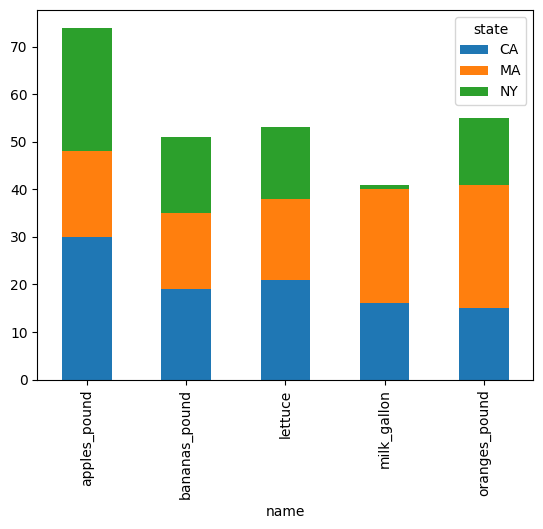

In [27]:
df_pivot.plot.bar(x = "name", stacked = True)

<Axes: xlabel='unit_price', ylabel='Count'>

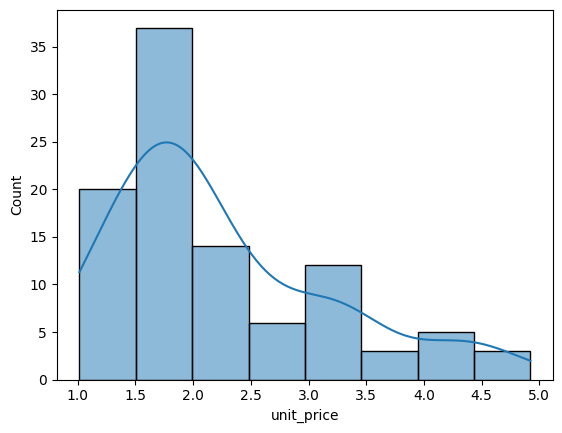

In [28]:
import seaborn as sns

# KDE plot of unit price
sns.histplot(dfnum["unit_price"], kde = True)

<Axes: ylabel='unit_price'>

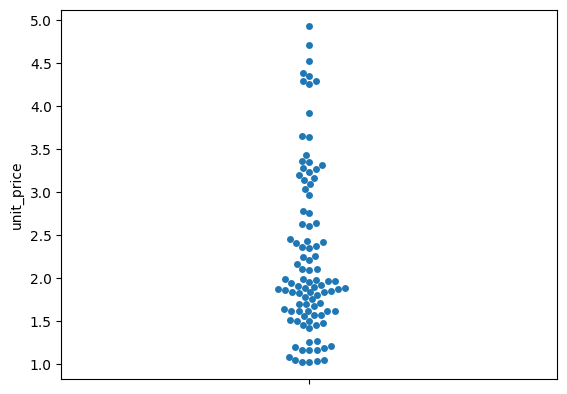

In [29]:
sns.swarmplot(dfnum["unit_price"])

<Axes: ylabel='unit_price'>

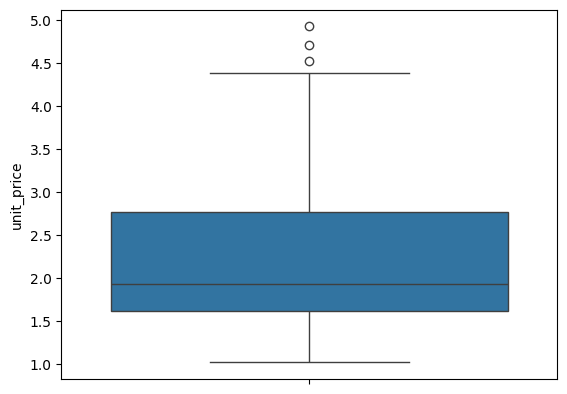

In [30]:
sns.boxplot(dfnum["unit_price"])

In [31]:
dfnum.unit_price.quantile(q = 0.25), dfnum.unit_price.quantile(q = 0.5), dfnum.unit_price.quantile(q = 0.75)

(np.float64(1.6081688545703108),
 np.float64(1.925289014579544),
 np.float64(2.757689504321805))

<Axes: ylabel='unit_price'>

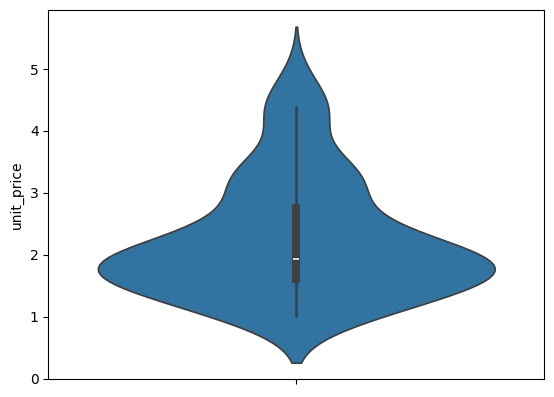

In [32]:
sns.violinplot(dfnum["unit_price"])

<Axes: xlabel='name', ylabel='unit_price'>

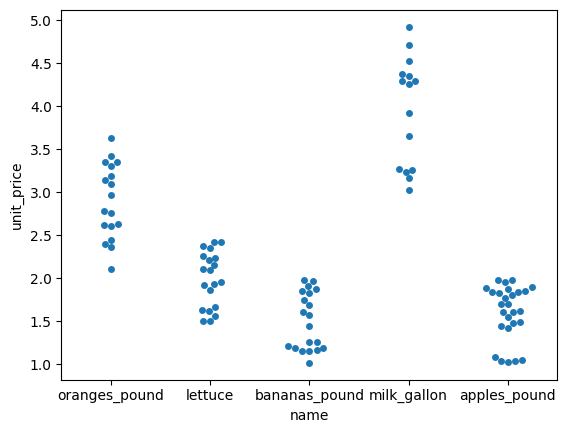

In [33]:
sns.swarmplot(data = df_groceries, x = "name", y = "unit_price")

<Axes: xlabel='name', ylabel='unit_price'>

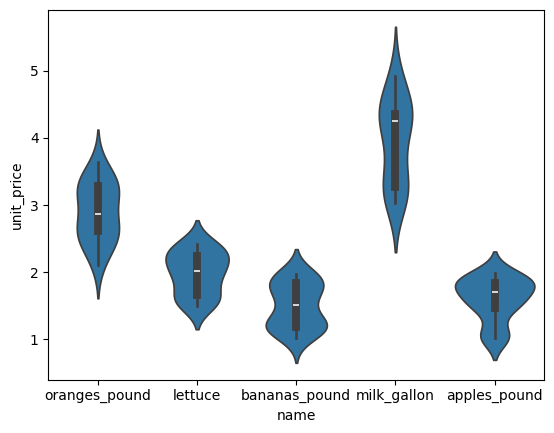

In [34]:
sns.violinplot(data = df_groceries, x = "name", y = "unit_price")

Who is our audience?

What do they need to know / what do they want to do?

How will our data prove it?

### Possibility 1:

Our audience is a data scientist working at this chain of grocery stores.

They need to focus on which items could benefit from coupons.

How can our data help them?
* Maybe the items with the highest variance in total spending will benefit the most from coupons.
* Because they are a data scientist, they can understand advanced plot types, such as KDE plots.

Text(0.5, 1.0, 'milk_gallon has the largest variation in total spending\n and might be best for coupons')

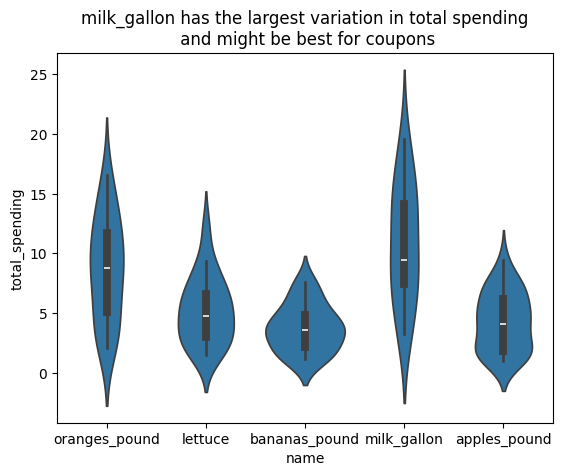

In [35]:
dfcopy2 = df_groceries.copy()
dfcopy2["total_spending"] = dfcopy2["unit_price"] * dfcopy2["quantity"]
dfcopy2.groupby("name")["total_spending"].var()
name = dfcopy2.groupby("name")["total_spending"].var().idxmax()
sns.violinplot(data = dfcopy2, x = "name", y = "total_spending").set_title(f"{name} has the largest variation in total spending\n and might be best for coupons")

### Possibility 2:

Our audience is a manager at this chain of grocery stores.

They want to compare sales in different states, so that they can petition their supervisor for more resources to match their needs.

How can our data help them?
* Perhaps they would like to see the total sales for each product name
* This would be a bar chart and would not require any special expertise to understand.
* We already made this graph

Text(0.5, 1.0, 'Total sales (in dollars) from each state')

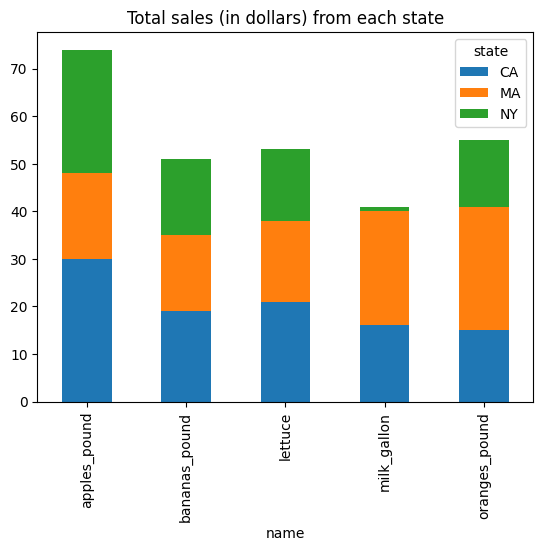

In [36]:
df_pivot.plot.bar(x = "name", stacked = True).set_title("Total sales (in dollars) from each state")

### Problem

The manager cannot easily compare the stacked bar heights.
Let's try putting them in parallel instead.

Text(0.5, 1.0, 'Total sales (in dollars) from each state')

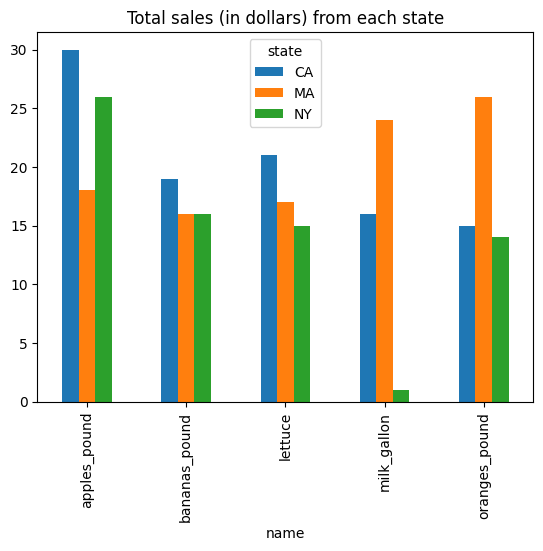

In [37]:
df_pivot.plot.bar(x = "name", stacked = False).set_title("Total sales (in dollars) from each state")